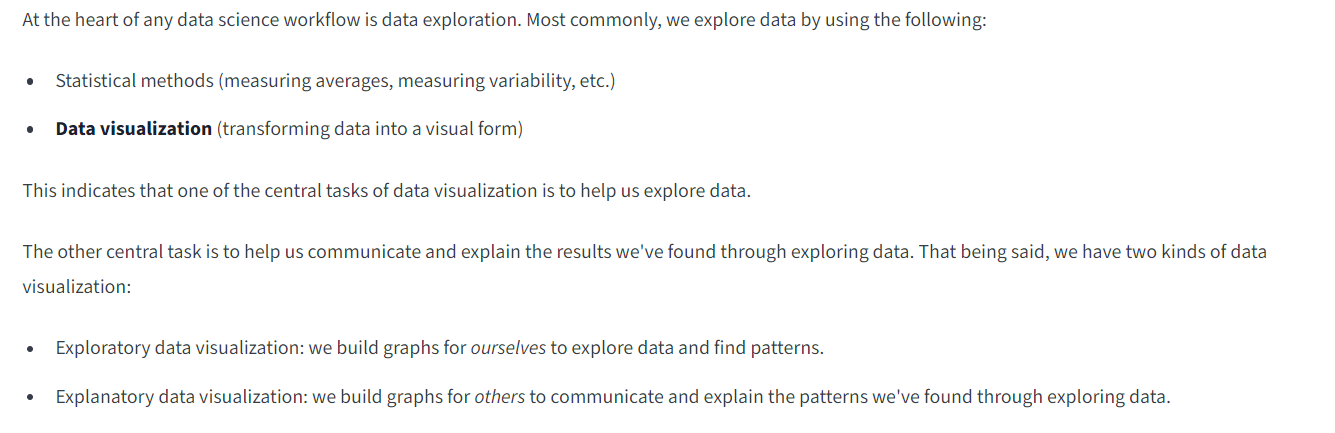

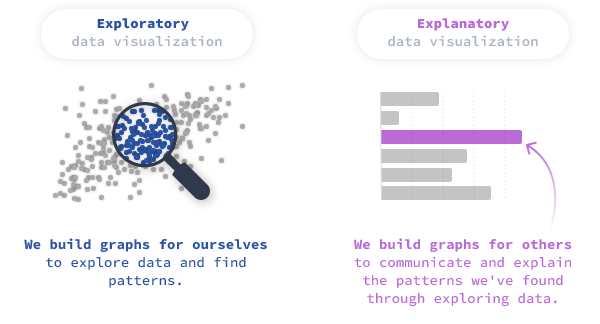

We're going to focus on **exploratory data visualization**. The main visualization library we're going to use is **Matplotlib**. We're going to learn the following:

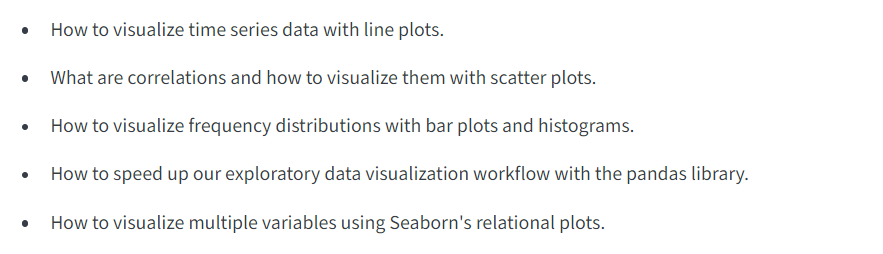

Next, our focus will be **explanatory data visualization**. We'll learn about 
* graph aesthetics, 
* information design principles, 
* storytelling data visualization, 
* customizing graphs with Matplotlib, and more.

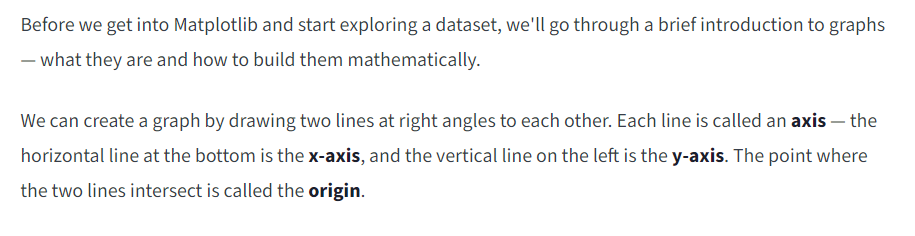

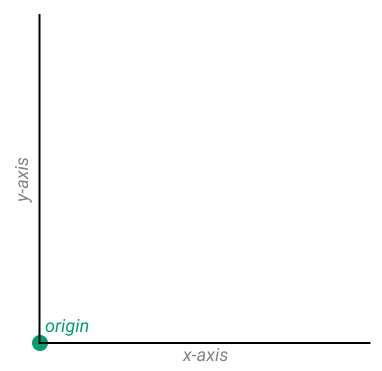

Each axis has **length** — below, we see both axes marked with numbers, which represent unit lengths.

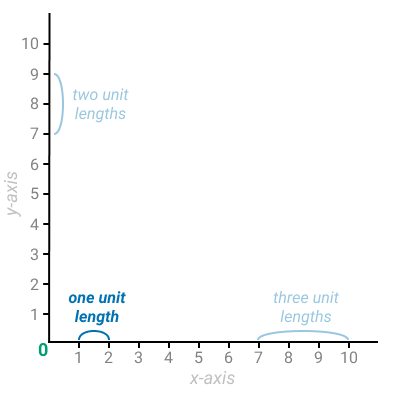

The length of the axes helps us precisely locate any point drawn on the graph. Point **A** on the graph below, for instance, is **seven length units** away from the `y-axis` and **two units** away from the `x-axis`.

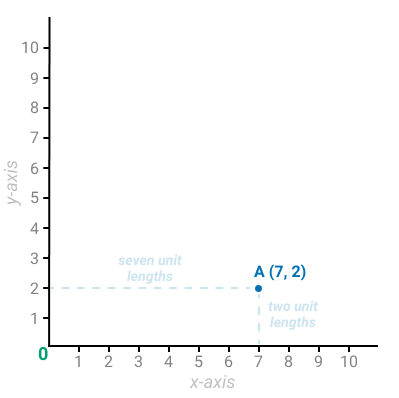

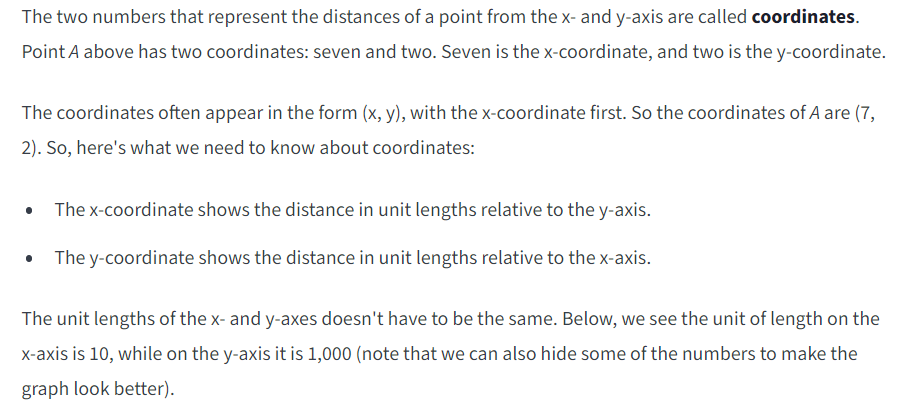

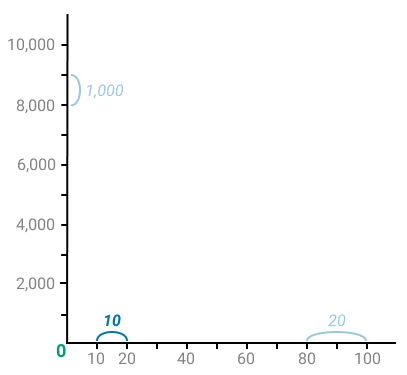

**Task**

Examine the graph below, and answer the following questions:

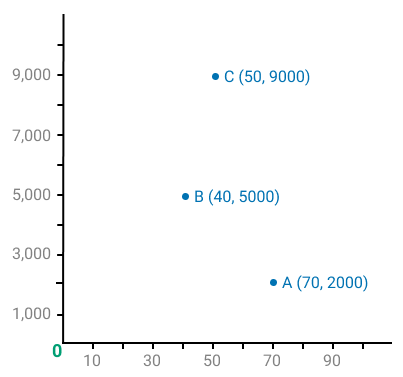

1. What is the unit length of the x-axis?
2. What is the unit length of the y-axis?
3. What is x-coordinate of point A? 
4. What is the y-coordinate of point B?
5. What are the x- and y-coordinates of point C?

**Answer**

In [1]:
x_unit_length = 10
y_unit_length = 1000
x_coordinate_A = 70
y_coordinate_B = 5000
C_coordinates = [50, 9000]

Below, we see a table showing the number of new COVID-19 infections reported world-wide for the first seven months of 2020:

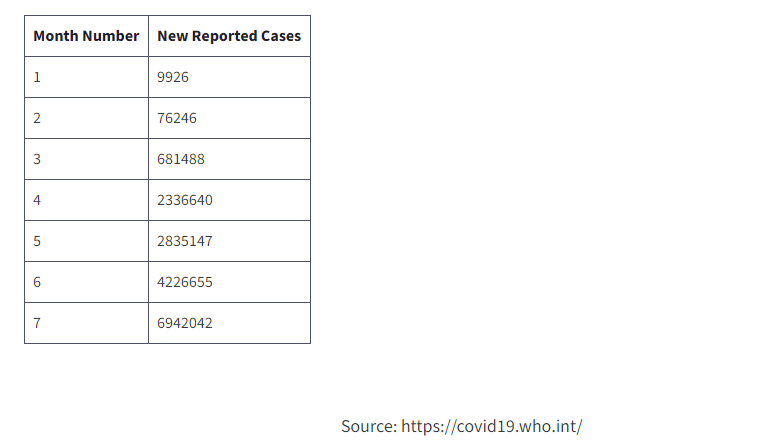

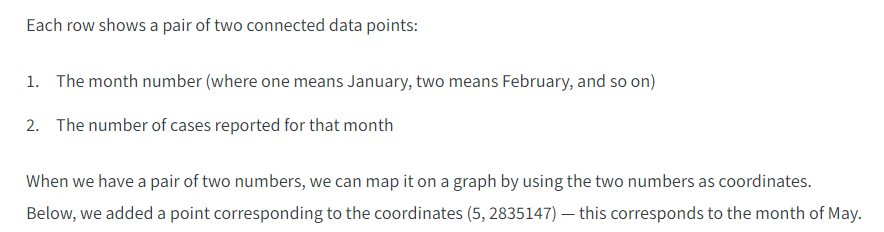

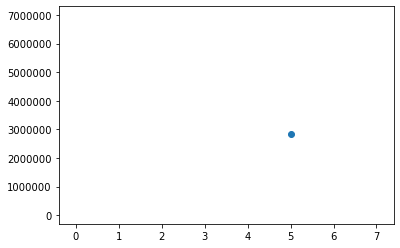

Let's now put all the data in the table on the graph following the same method:

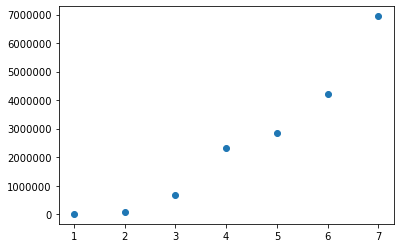

When we graph how something changes over time, we connect all the points with a line — above, we graphed how the number of new COVID-19 cases changed month by month.

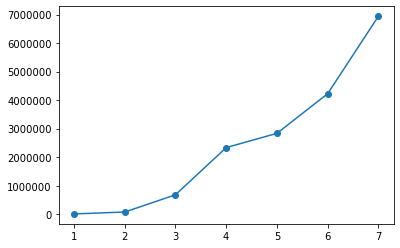

Because we use **lines** to **connect the points**, the graph above is a **line graph** (also known as a **line plot**, or **line chart**; the distinction between **graph**, **plot** and **chart** is ambiguous in the data visualization world, with different authors assigning slightly different meanings to these terms —, we use all three synonymously).

When we create line graphs, it's common to hide the points on the line:

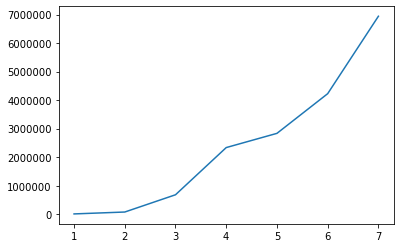

By looking at the line graph we built for our table above, we can see a few patterns.

Overall, the line shows an upward direction, which indicates the number of new reported cases has gone up month by month and has never decreased or stabilized. This is mostly a result of the virus spreading. Countries also started to test more people, which increased the number of new reported cases.

The line connecting **January to March** has a moderate upward steepness (the January-February line is almost horizontal), which indicates a moderate increase in the number of new reported cases. In that period, the virus was just starting to spread around the world, and many countries were testing people only when they got to the hospital.

The **March-April line** is very steep, indicating a surge in new reported cases. The **April-May line** shows a mild steepness, so the number of new cases remained high (around three million). However, the number didn't increase too much compared to April — this is most likely due to the worldwide lockdowns.

The **May-July line** is very steep, indicating another surge in the number of cases (from about three million to approximately seven million). This is most likely because of ending the lockdowns, which created the conditions for more virus spreading.

Learning how to interpret graphs is just as important as knowing how to build them.

**Task**

Below, we see a line graph showing how the number of new reported deaths has evolved by month in **January-July** interval. Examine the graph and then evaluate the truth value of the following sentences:

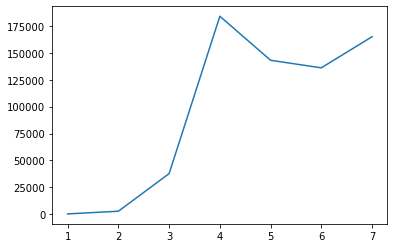

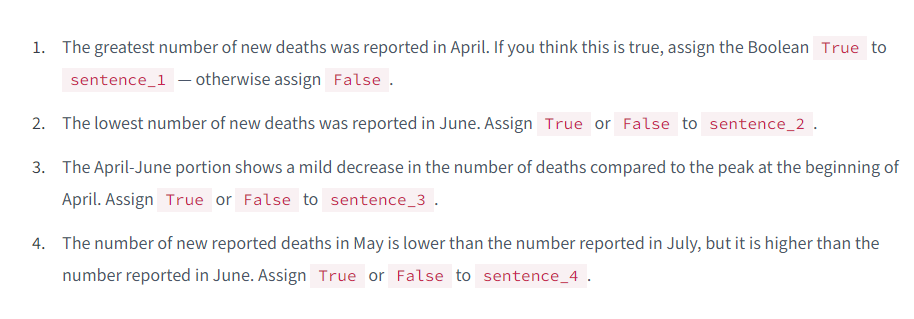

**Answer**

In [2]:
sentence_1 = True
sentence_2 = False
sentence_3 = True
sentence_4 = True

The `plt.plot()` function generates a line graph by default. All it needs is two arrays of data of the same length — these can be **Python lists**, **pandas Series**, **NumPy arrays**, etc.

The two arrays must be equal in length, or some coordinates will remain unpaired, and `Matplotlib` will raise an error.

**Task**

Let's create a new line graph using following 2 lists;

In [14]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_cases = [99260, 762461, 6814882, 23366403,28351474, 42266555, 69420426]

**Answer**

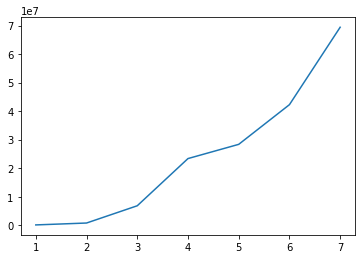

In [15]:
import matplotlib.pyplot as plt
plt.plot(month_number, new_cases)
plt.show()

On the top left side of the graph, we see an **1e6** sign — this is scientific notation. Matplotlib changes to scientific notation if one value on the axis needs to be one million or greater. If we want to remove scientific notation, we can use the [plt.ticklabel_format(axis, style)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ticklabel_format.html#matplotlib-pyplot-ticklabel-format) function.

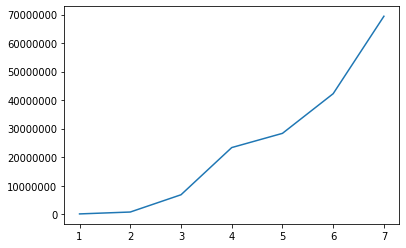

In [16]:
plt.plot(month_number, new_cases)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

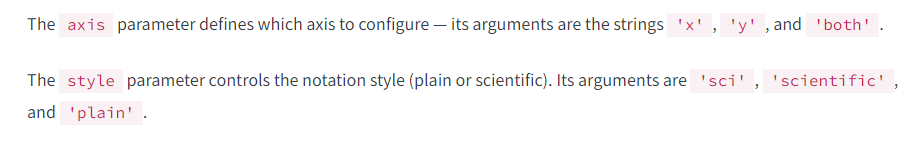

Adding a **title** and **axis labels** are always a good thing — even if we're just exploring data for ourselves and no one else will ever see our work.

We create many graphs when we explore data, and we often lose track of what each graph describes. If we plot a graph now and then examine it again forty minutes later, the **title** and the **axis labels** will help us immediately determine what that graph is about.

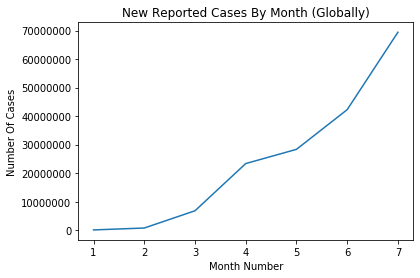

In [18]:
# Adding Title and axis labels

plt.plot(month_number, new_cases)
plt.title('New Reported Cases By Month (Globally)')
plt.xlabel('Month Number')
plt.ylabel('Number Of Cases')
plt.ticklabel_format(axis = "y", style = "plain")
plt.show()

Next, we're going to use a larger dataset that we've collected from the [World Health Organization](https://covid19.who.int/).

In [19]:
import pandas as pd
who_time_series = pd.read_csv('WHO_time_series.csv')
who_time_series.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


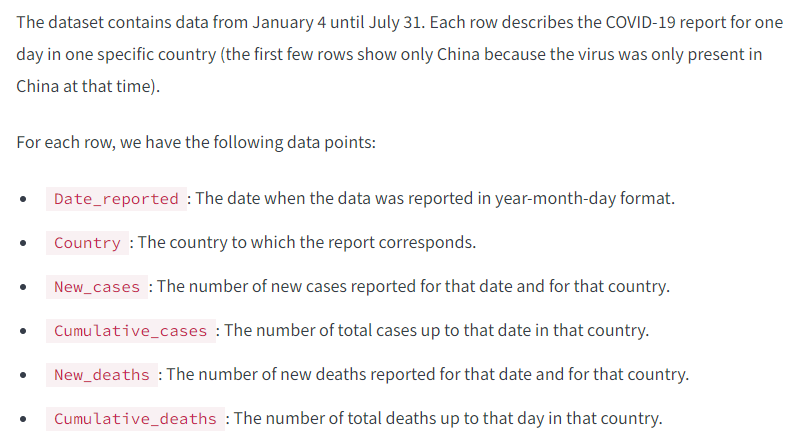

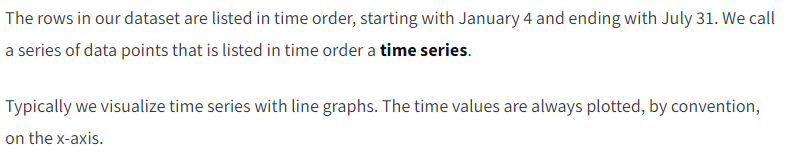

In [20]:
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])

In [22]:
who_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      31876 non-null  datetime64[ns]
 1   Country            31876 non-null  object        
 2   New_cases          31876 non-null  int64         
 3   Cumulative_cases   31876 non-null  int64         
 4   New_deaths         31876 non-null  int64         
 5   Cumulative_deaths  31876 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


**Italy** was the second epicenter of the pandemic after **China**. Let's see how the total number of cumulative cases (recall this is different from the number of new cases) evolved over the first seven months of 2020. In the code below, we begin by isolating the data for **Italy**, and then we create the plot.

In [23]:
italy = who_time_series[who_time_series['Country'] == 'Italy']

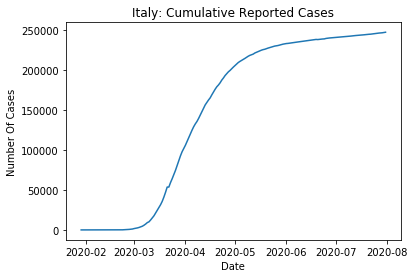

In [24]:
plt.plot(italy['Date_reported'], italy['Cumulative_cases'])
plt.title('Italy: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

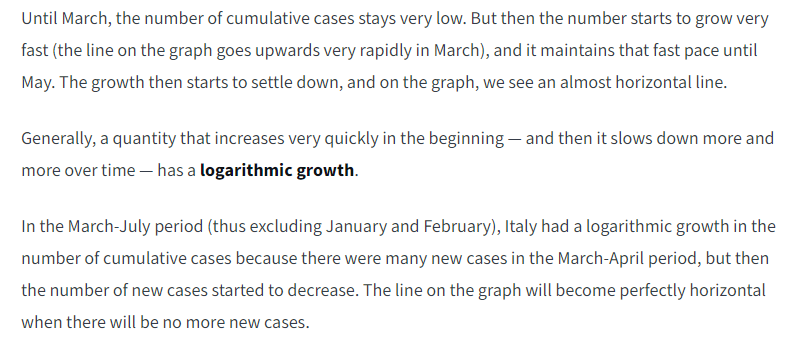

If we look at **India**, we can see another type of growth:

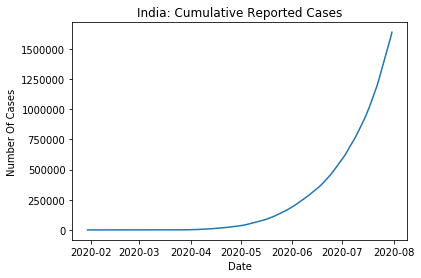

In [25]:
india = who_time_series[who_time_series['Country'] == 'India']

plt.plot(india['Date_reported'], india['Cumulative_cases'])
plt.title('India: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

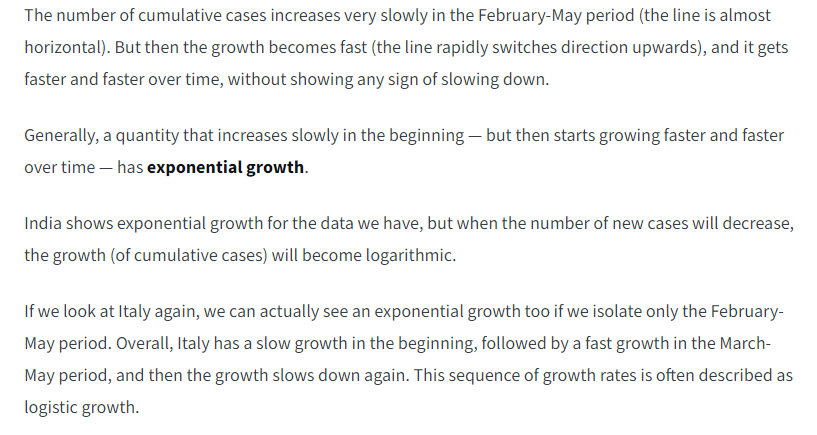

Now, let's plot a line graph for **Poland** to see another type of growth:

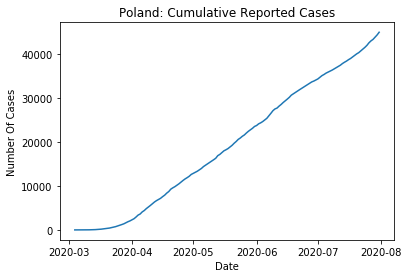

In [26]:
poland = who_time_series[who_time_series['Country'] == 'Poland']

plt.plot(poland['Date_reported'], poland['Cumulative_cases'])
plt.title('Poland: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

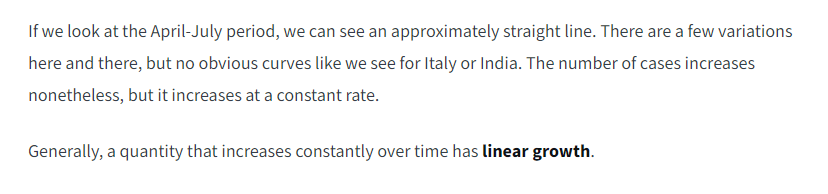

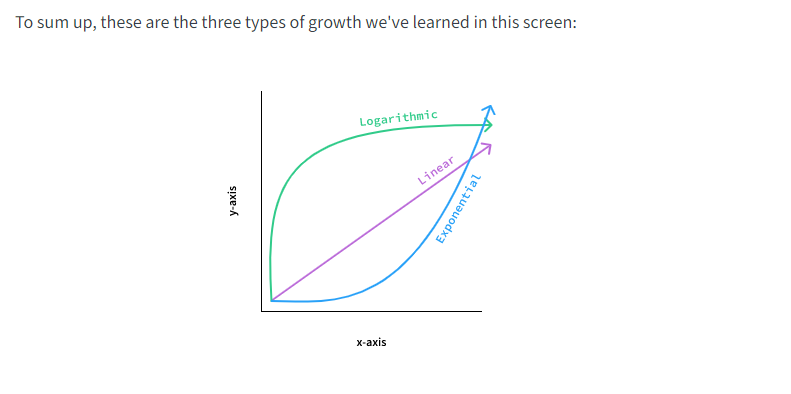

In [27]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()

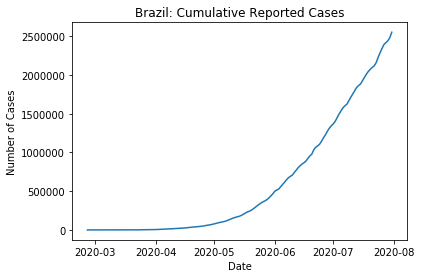

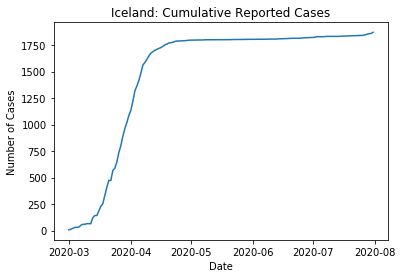

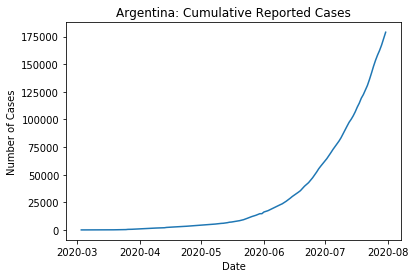

In [28]:
plot_cumulative_cases('Brazil')
plot_cumulative_cases('Iceland')
plot_cumulative_cases('Argentina')

In [29]:
brazil = 'exponential'
iceland = 'logarithmic'
argentina = 'exponential'

We learned three common types of growth: 

* Linear, 
* Exponential, and 
* Logarithmic.

As a word of caution, labeling a type of growth just by looking at a graph is far from being precise. These types of growth are best described by precise and well-defined mathematical functions. However, these visual approximations can serve as useful mind tools that we can use to interpret how time series data change.

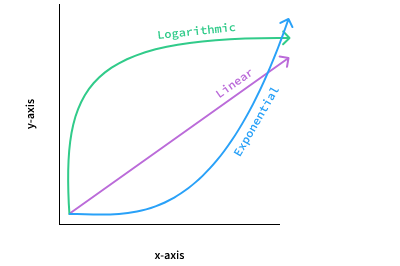

Change is not only about growth. A quantity can also decrease following a linear, exponential, or logarithmic pattern.

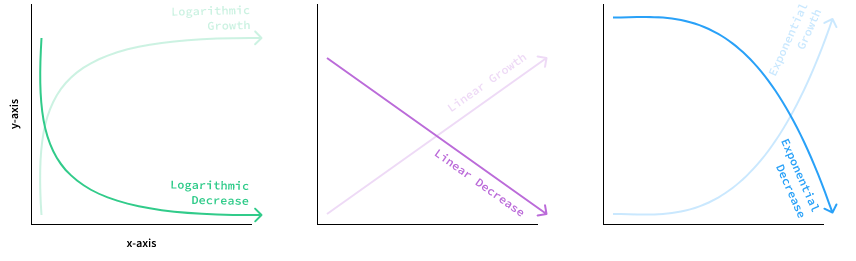

The data, however, rarely fits any of these patterns perfectly. Most often, our line graphs are only 
* approximately linear, 
* approximately exponential, or 
* approximately logarithmic. 

Moreover, 
* One portion of a single line graph can show an exponential change, 
* Another portion of the same graph can show a linear change, 
* While another can show an irregular change that doesn't resemble any common pattern.

In practice, most of the line graphs we plot don't show any clear pattern. We need to pay close attention to what we see and try to extract meaning without forcing the data into some patterns we already know.

If we look at the evolution of new cases in **Belarus**, for instance, we see many irregularities on the line graph:

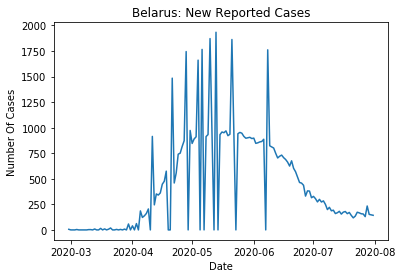

In [31]:
belarus = who_time_series[who_time_series['Country'] == 'Belarus']

plt.plot(belarus['Date_reported'], belarus['New_cases'])
plt.title('Belarus: New Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

In the **April-July** period, we see several spikes on the graph going either upward or downward.
* For some days, the number of new cases gets close to **2,000** (the upward spikes), while 
* For others is zero (the downwards spikes). 

These large variations suggest that the reports didn't arrive daily — it may be that no one sent reports over the weekends or on national holidays. The number of new cases keeps increasing until the next report, and then we see one of those upward spikes.

When we see irregularities on a line graph, this doesn't mean we can't extract any meaning. By analyzing the irregularities, we can sometimes uncover interesting details.

Next, we're going to focus on comparing line graphs.

One of the key elements of data exploration is comparison — how does this value compare to that other value? For our COVID-19 time series, we can formulate many questions in terms of comparison:

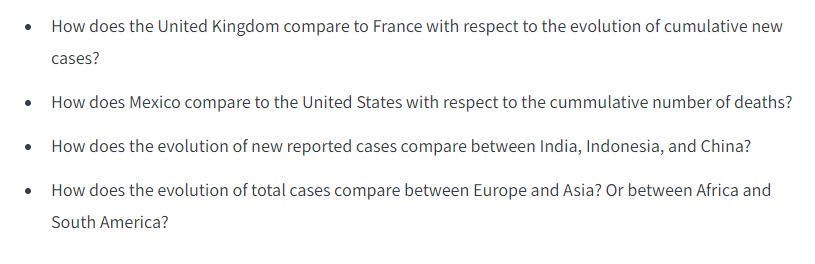

For instance, let's visualize the evolution of cumulative cases for **France** and the **United Kingdom**. `Matplotlib` allows us to have two line graphs sharing the same `x-axis` and `y-axis`:

In [32]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']

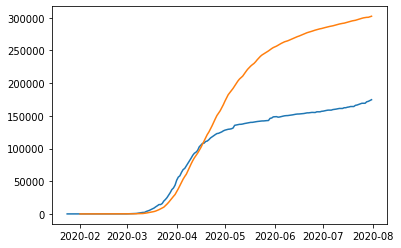

In [36]:
plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.show()

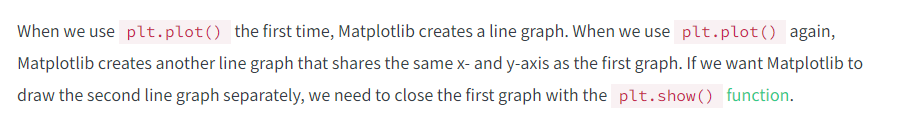

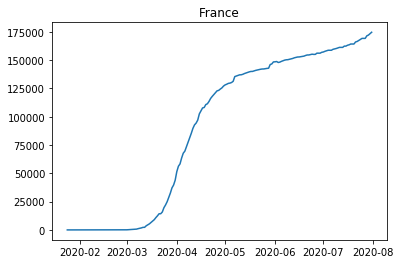

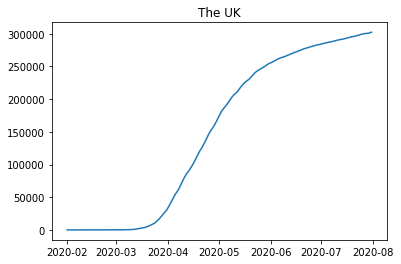

In [35]:
plt.plot(france['Date_reported'], france['Cumulative_cases'])
plt.title('France')
plt.show()

plt.plot(uk['Date_reported'], uk['Cumulative_cases'])
plt.title('The UK')
plt.show()

Looking at the two graphs above, the evolution of cumulative cases looks very similar if we only judge by the shape of the line. If we look on the y-axis, however, we see that the two graphs have different ranges, and the values for the **UK** are almost twice as large. It's much easier to compare these two visualizations if they share the same axes.

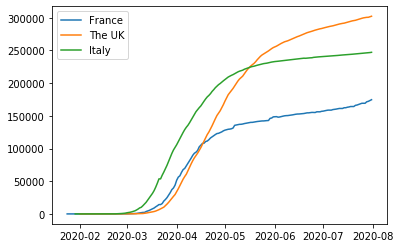

In [37]:
plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.legend()
plt.show()

In [38]:
greatest_july = 'UK'
lowest_july = 'France'
increase_march = 'Italy'

We learned how to do the following:

* Plot and customize a **line graph** using `Matplotlib`.
* Visualize **time series** with **line graphs**.
* Interpret line plots by identifying types of change

In the next file, we're going to learn about **seasonality**, **correlation**, and **scatter plots**.